<a href="https://colab.research.google.com/github/IvanChikulaev/Plates/blob/master/plates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!git clone https://github.com/IvanChikulaev/Plates	

fatal: destination path 'Plates' already exists and is not an empty directory.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
 
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, ResNet50

from keras.models import Model
import os 
import cv2


In [0]:
train_clear = './Plates/train/cleaned'
train_dirty = './Plates/train/dirty'

val_clear = './Plates/val/cleaned'
val_dirty = './Plates/val/dirty'

train_array = []
val_array = []

for filepath in os.listdir(train_clear):
    img = (cv2.imread(train_clear+'/{0}'.format(filepath)))
    img = cv2.resize(img,(224,224))
    img_r, img_g, img_b = cv2.split(img)
    img_rgb = cv2.merge([img_r, img_g, img_b])
    train_array.append(img_rgb)
    img_grb = cv2.merge([img_g, img_r, img_b])
    train_array.append(img_grb)
    img_gbr = cv2.merge([img_g, img_b, img_r])
    train_array.append(img_gbr)
    img_rbg = cv2.merge([img_r, img_b, img_g])
    train_array.append(img_rbg)
    img_bgr = cv2.merge([img_b, img_g, img_r])
    train_array.append(img_bgr)
    img_brg = cv2.merge([img_b,img_r,img_g])
    train_array.append(img_bgr)

for filepath in os.listdir(train_dirty):
    img = (cv2.imread(train_dirty+'/{0}'.format(filepath)))
    img = cv2.resize(img,(224,224))
    img_r, img_g, img_b = cv2.split(img)
    img_rgb = cv2.merge([img_r, img_g, img_b])
    train_array.append(img_rgb)
    img_grb = cv2.merge([img_g, img_r, img_b])
    train_array.append(img_grb)
    img_gbr = cv2.merge([img_g, img_b, img_r])
    train_array.append(img_gbr)
    img_rbg = cv2.merge([img_r, img_b, img_g])
    train_array.append(img_rbg)
    img_bgr = cv2.merge([img_b, img_g, img_r])
    train_array.append(img_bgr)
    img_brg = cv2.merge([img_b,img_r,img_g])
    train_array.append(img_bgr)

for filepath in os.listdir(val_clear):
    img = (cv2.imread(val_clear+'/{0}'.format(filepath)))
    img = cv2.resize(img,(224,224))
    img_r, img_g, img_b = cv2.split(img)
    img_rgb = cv2.merge([img_r, img_g, img_b])
    val_array.append(img_rgb)
    img_grb = cv2.merge([img_g, img_r, img_b])
    val_array.append(img_grb)
    img_gbr = cv2.merge([img_g, img_b, img_r])
    val_array.append(img_gbr)
    img_rbg = cv2.merge([img_r, img_b, img_g])
    val_array.append(img_rbg)
    img_bgr = cv2.merge([img_b, img_g, img_r])
    val_array.append(img_bgr)
    img_brg = cv2.merge([img_b,img_r,img_g])
    val_array.append(img_bgr)

for filepath in os.listdir(val_dirty):
    img = (cv2.imread(val_dirty+'/{0}'.format(filepath)))
    img = cv2.resize(img,(224,224))
    img_rgb = cv2.merge([img_r, img_g, img_b])
    val_array.append(img_rgb)
    img_grb = cv2.merge([img_g, img_r, img_b])
    val_array.append(img_grb)
    img_gbr = cv2.merge([img_g, img_b, img_r])
    val_array.append(img_gbr)
    img_rbg = cv2.merge([img_r, img_b, img_g])
    val_array.append(img_rbg)
    img_bgr = cv2.merge([img_b, img_g, img_r])
    val_array.append(img_bgr)
    img_brg = cv2.merge([img_b,img_r,img_g])
    val_array.append(img_bgr)

X_train = np.array(train_array)
X_val = np.array(val_array)

print(len(X_train))
print(len(X_val))
n_train = (int(len(X_train))/2)
y_train = np.ones(int(n_train))
y_train = np.append(np.zeros(int(n_train)),y_train)

n_val = (int(len(X_val))/2)
y_val = np.ones(int(n_val))
y_val = np.append(np.zeros(int(n_val)),y_val)

1.0


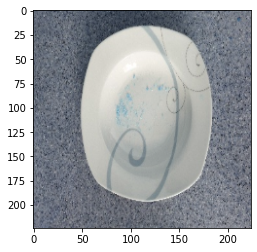

In [55]:
plt.imshow(X_train[120])
print(y_train[120])

In [0]:
for i in range(len(X_train)):
  X_train[i] = X_train[i]/255

for i in range(len(X_val)):
  X_val[i] = X_val[i]/255

In [57]:


datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

model_vgg = ResNet50(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
#model.compile(Adam(0.001),loss='binary_crossentropy',metrics=['acc'])


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 7s 0us/step


In [99]:
model = Sequential()
model.add(model_vgg)
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_17 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_33 (Dense)             (None, 120)               12042360  
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 121       
Total params: 35,630,193
Trainable params: 35,577,073
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer=Adam(0.001),metrics=['accuracy'])

In [101]:
history = model.fit(X_train,y_train,epochs=20,batch_size=60,validation_data = (X_val,y_val), shuffle=1)

Train on 180 samples, validate on 60 samples
Epoch 1/20


ResourceExhaustedError: ignored